In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import numpy.linalg as la

# Dimension Reduction

In [3]:
np.random.seed(123)
np.set_printoptions(3)

### PCA from scratch

Principal Components Analysis (PCA) basically means to find and rank all the eigenvalues and eigenvectors of a covariance matrix. This is useful because high-dimensional data (with $p$ features) may have nearly all their variation in a small number of dimensions $k$, i.e. in the subspace spanned by the eigenvectors of the covariance matrix that have the $k$ largest eigenvalues. If we project the original data into this subspace, we can have a dimension reduction (from $p$ to $k$) with hopefully little loss of information.

For zero-centered vectors,

\begin{align}
\text{Cov}(X, Y) &= \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{n-1} \\
  &= \frac{\sum_{i=1}^nX_iY_i}{n-1} \\
  &= \frac{XY^T}{n-1}
\end{align}

and so the covariance matrix for a data set X that has zero mean in each feature vector is just $XX^T/(n-1)$. 

In other words, we can also get the eigendecomposition of the covariance matrix from the positive semi-definite matrix $XX^T$.

We will take advantage of this when we cover the SVD later in the course.

Note: Here we are using a matrix of **row** vectors

In [4]:
n = 100
x1, x2, x3 = np.random.normal(0, 10, (3, n))
x4 = x1 + np.random.normal(size=x1.shape)
x5 = x1 + x2 + np.random.normal(size=x1.shape)
x6 = x1 + x2 + x3 + np.random.normal(size=x1.shape)

#### For PCA calculations, each column is an observation

In [5]:
xs = np.c_[x1, x2, x3, x4, x5, x6].T

In [6]:
xs[:, :10]

array([[-10.856,   9.973,   2.83 , -15.063,  -5.786,  16.514, -24.267,
         -4.289,  12.659,  -8.667],
       [  6.421, -19.779,   7.123,  25.983,  -0.246,   0.341,   1.795,
        -18.62 ,   4.261, -16.054],
       [  7.033,  -5.981,  22.007,   6.883,  -0.063,  -2.067,  -0.865,
         -9.153,  -0.952,   2.787],
       [-10.091,   9.144,   2.171, -14.452,  -5.93 ,  17.831, -24.971,
         -3.539,  13.002,  -8.794],
       [ -2.902, -10.335,   9.461,   9.611,  -6.041,  17.833, -24.222,
        -23.575,  16.957, -23.871],
       [  3.349, -15.717,  31.694,  18.733,  -4.835,  16.127, -24.327,
        -32.596,  14.267, -22.173]])

#### Center each observation

In [7]:
xc = xs - np.mean(xs, 1)[:, np.newaxis]

In [8]:
xc[:, :10]

array([[-1.113e+01,  9.702e+00,  2.559e+00, -1.533e+01, -6.057e+00,
         1.624e+01, -2.454e+01, -4.560e+00,  1.239e+01, -8.938e+00],
       [ 6.616e+00, -1.958e+01,  7.318e+00,  2.618e+01, -5.090e-02,
         5.368e-01,  1.991e+00, -1.842e+01,  4.457e+00, -1.586e+01],
       [ 7.984e+00, -5.030e+00,  2.296e+01,  7.834e+00,  8.882e-01,
        -1.115e+00,  8.609e-02, -8.202e+00, -7.123e-04,  3.738e+00],
       [-1.023e+01,  9.007e+00,  2.033e+00, -1.459e+01, -6.068e+00,
         1.769e+01, -2.511e+01, -3.676e+00,  1.286e+01, -8.931e+00],
       [-3.005e+00, -1.044e+01,  9.358e+00,  9.507e+00, -6.145e+00,
         1.773e+01, -2.433e+01, -2.368e+01,  1.685e+01, -2.398e+01],
       [ 4.117e+00, -1.495e+01,  3.246e+01,  1.950e+01, -4.067e+00,
         1.689e+01, -2.356e+01, -3.183e+01,  1.503e+01, -2.141e+01]])

#### Covariance

Remember the formula for covariance

$$
\text{Cov}(X, Y) = \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
$$

where $\text{Cov}(X, X)$ is the sample variance of $X$.

In [9]:
cov = (xc @ xc.T)/(n-1)

In [10]:
cov

array([[128.578,  -2.133,  -6.661, 127.395, 126.492, 122.225],
       [ -2.133,  95.051,   2.269,  -1.349,  91.344,  95.094],
       [ -6.661,   2.269,  94.934,  -5.048,  -3.337,  90.636],
       [127.395,  -1.349,  -5.048, 126.993, 126.219, 123.388],
       [126.492,  91.344,  -3.337, 126.219, 217.404, 216.84 ],
       [122.225,  95.094,  90.636, 123.388, 216.84 , 311.386]])

#### Check

In [11]:
np.cov(xs)

array([[128.578,  -2.133,  -6.661, 127.395, 126.492, 122.225],
       [ -2.133,  95.051,   2.269,  -1.349,  91.344,  95.094],
       [ -6.661,   2.269,  94.934,  -5.048,  -3.337,  90.636],
       [127.395,  -1.349,  -5.048, 126.993, 126.219, 123.388],
       [126.492,  91.344,  -3.337, 126.219, 217.404, 216.84 ],
       [122.225,  95.094,  90.636, 123.388, 216.84 , 311.386]])

#### Eigendecomposition

In [12]:
e, v = la.eigh(cov)

In [13]:
idx = np.argsort(e)[::-1]

In [14]:
e = e[idx]
v = v[:, idx]

#### Explain the magnitude of the eigenvalues

Note that $x4, x5, x6$ are linear combinations of $x1, x2, x3$ with some added noise, and hence the last 3 eigenvalues are small. 

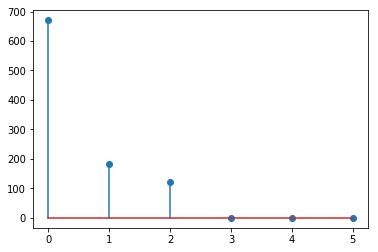

In [15]:
plt.stem(e)
pass

#### The eigenvalues and eigenvectors give a factorization of the covariance matrix

In [16]:
v @ np.diag(e) @ v.T

array([[128.578,  -2.133,  -6.661, 127.395, 126.492, 122.225],
       [ -2.133,  95.051,   2.269,  -1.349,  91.344,  95.094],
       [ -6.661,   2.269,  94.934,  -5.048,  -3.337,  90.636],
       [127.395,  -1.349,  -5.048, 126.993, 126.219, 123.388],
       [126.492,  91.344,  -3.337, 126.219, 217.404, 216.84 ],
       [122.225,  95.094,  90.636, 123.388, 216.84 , 311.386]])

### PCA is just a change of basis 

![Commuative diagram](figs/spectral.png)

In [17]:
m = np.zeros(2)
s = np.array([[1, 0.8], [0.8, 1]])
x = np.random.multivariate_normal(m, s, n).T

In [18]:
x.shape

(2, 100)

#### Calculate covariance matrix from centered observations

In [19]:
xc = (x - x.mean(1)[:, np.newaxis])

In [20]:
cov = (xc @ xc.T)/(n-1)

In [21]:
cov

array([[1.014, 0.881],
       [0.881, 1.163]])

#### Find eigendecoposition

In [22]:
e, v = la.eigh(cov)
idx = np.argsort(e)[::-1]
e = e[idx]
v = v[:, idx]

#### In original coordinates

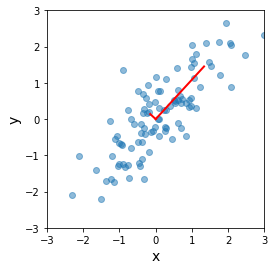

In [23]:
plt.scatter(x[0], x[1], alpha=0.5)
for e_, v_ in zip(e, v.T):
    plt.plot([0, e_*v_[0]], [0, e_*v_[1]], 'r-', lw=2)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.axis('square')
plt.axis([-3,3,-3,3])
pass

#### After change of basis

In [24]:
yc = v.T @ xc

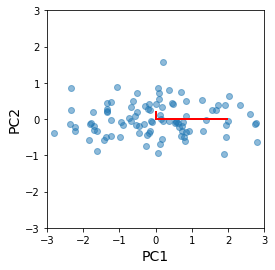

In [25]:
plt.scatter(yc[0,:], yc[1,:], alpha=0.5)
for e_, v_ in zip(e, np.eye(2)):
    plt.plot([0, e_*v_[0]], [0, e_*v_[1]], 'r-', lw=2)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.axis('square')
plt.axis([-3,3,-3,3])
pass

#### Explained variance

This is just a consequence of the invariance of the trace under change of basis. Since the original diagnonal entries in the covariance matrix are the variances of the featrues, the sum of the eigenvalues must also be the sum of the orignal varainces. In other words, the cumulateive proportion of the top $n$ eigenvaluee is the "explained variance" of the first $n$ principal components. 

In [26]:
e/e.sum()

array([0.906, 0.094])

#### Check

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA()

#### Note that the PCA from scikit-learn works with feature vectors, not observation vectors

In [29]:
z = pca.fit_transform(x.T)

In [30]:
pca.explained_variance_ratio_

array([0.906, 0.094])

#### The principal components are identical to our home-brew version, up to a flip in direction of eigenvectors

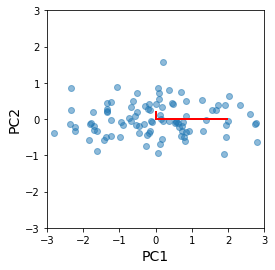

In [31]:
plt.scatter(z[:, 0], z[:, 1], alpha=0.5)
for e_, v_ in zip(e, np.eye(2)):
    plt.plot([0, e_*v_[0]], [0, e_*v_[1]], 'r-', lw=2)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.axis('square')
plt.axis([-3,3,-3,3])
pass

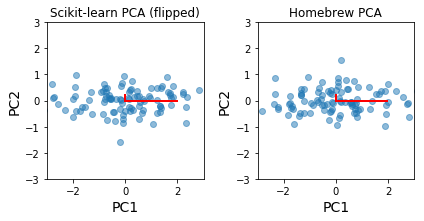

In [32]:
plt.subplot(121)
plt.scatter(-z[:, 0], -z[:, 1], alpha=0.5)
for e_, v_ in zip(e, np.eye(2)):
    plt.plot([0, e_*v_[0]], [0, e_*v_[1]], 'r-', lw=2)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.title('Scikit-learn PCA (flipped)')

plt.subplot(122)
plt.scatter(yc[0,:], yc[1,:], alpha=0.5)
for e_, v_ in zip(e, np.eye(2)):
    plt.plot([0, e_*v_[0]], [0, e_*v_[1]], 'r-', lw=2)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.title('Homebrew PCA')
plt.tight_layout()
pass